<a href="https://colab.research.google.com/github/patbaa/demo_notebooks/blob/master/solution_hw_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Download the cifar100 dataset via the tensorflow/keras API
 - how many classes do we have in the dataset? how many train and test examples do we have?
 - what is the dimension of the images?
 - show 5 images from the dataset!
 - make one-hot encoding for the labels

 
## 2. creating CNN architecutre
 - create a convolutional neural network
 - the network should have the following layers:
   - input (32, 32, 3)
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - flatten
   - dense, 100 neurons, softmax activation
 - how many parameters do we have for each layer?
 
## 3. training the CNN
 - use Adam optimizer with default parameters
 - use categorical crossentropy as loss function
 - compile the model
 - print out a summary of the model
 - train the CNN on the training data for 5 epochs with batch size of 32
 - use the test data as validation data
 
## 4. Evaluate performance
 - plot the training and the validation loss on the same plot!
 - plot the training and the validation accuracy on the same plot!
 - do we overfit?

## 5. Train an other CNN
 - as we can see the previous archutecture is not the best...
 - come up with an architecture that can achieve more than 50% accuracy on the test set.
 - print out the summary for this model!
 - plot the loss and accuracy curves for this model too!

## 1. Download the cifar100 dataset via the keras API
 - how many classes do we have in the dataset? how many train and test examples do we have?
 - what is the dimension of the images?
 - show 5 images from the dataset!
 - make one-hot encodig for the labels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100


%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
x_train.shape

# we have 50k images, each is 32*32pixels with 3 color channels

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
len(pd.unique(y_train.reshape(y_train.shape[0])))
# we have 100 classes

100

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


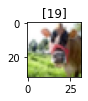

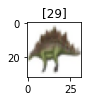

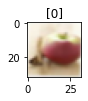

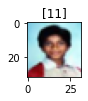

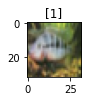

In [6]:
plt.rcParams['figure.figsize'] = (1, 1)
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train_oh = to_categorical(y_train)
y_test_oh  = to_categorical(y_test)

## 2. creating CNN architecutre
 - create a convolutional neural network
 - the network should have the following layers:
   - input (32, 32, 3)
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - flatten
   - dense, 100 neurons, softmax activation
 - how many parameters do we have for each layer?

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [10]:
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

## 3. training the CNN
 - scale the training and testing data to have 0 mean and 1 variance!
 - use Adam optimizer with default parameters
 - use categorical crossentropy as loss function
 - use accuracy as metric
 - compile the model
 - print out a summary of the model
 - train the CNN on the training data for 5 epochs with batch size of 32
 - save the history of the training process!

In [11]:
std = x_train.std()
mean = x_train.mean()

x_train = (x_train - mean)/std
x_test  = (x_test - mean)/std

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train_oh, epochs=10, batch_size=32, validation_data=(x_test, y_test_oh))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 3.6181 - accuracy: 0.1622 - val_loss: 3.1553 - val_accuracy: 0.2533
Epoch 2/10
1563/1563 [==============================] - 5s 4ms/step - loss: 2.9287 - accuracy: 0.2855 - val_loss: 2.9245 - val_accuracy: 0.2900
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.6373 - accuracy: 0.3415 - val_loss: 2.7105 - val_accuracy: 0.3324
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4335 - accuracy: 0.3856 - val_loss: 2.6492 - val_accuracy: 0.3419
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 2.2859 - accuracy: 0.4165 - val_loss: 2.6348 - val_accuracy: 0.3526
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1691 - accuracy: 0.4433 - val_loss: 2.5484 - val_accuracy: 0.3734
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 2.0773 - accuracy: 0.4620 - val_loss: 2.6440 - val_accuracy:

## 4. Evaluate performance
 - plot the training and the validation loss on the same plot!
 - plot the training and the validation accuracy on the same plot!
 - do we overfit?

In [14]:
history.history

{'accuracy': [0.16218000650405884,
  0.2854599952697754,
  0.34154000878334045,
  0.385560005903244,
  0.41648000478744507,
  0.4432600140571594,
  0.46195998787879944,
  0.4830000102519989,
  0.49606001377105713,
  0.508620023727417],
 'loss': [3.6180667877197266,
  2.928663969039917,
  2.6373465061187744,
  2.4335083961486816,
  2.2859439849853516,
  2.169074296951294,
  2.0772757530212402,
  1.9903419017791748,
  1.9251724481582642,
  1.8606226444244385],
 'val_accuracy': [0.2533000111579895,
  0.28999999165534973,
  0.33239999413490295,
  0.3418999910354614,
  0.35260000824928284,
  0.3734000027179718,
  0.35839998722076416,
  0.3707999885082245,
  0.36550000309944153,
  0.3666999936103821],
 'val_loss': [3.155283212661743,
  2.924504518508911,
  2.710460662841797,
  2.649221897125244,
  2.6347835063934326,
  2.5484073162078857,
  2.6440086364746094,
  2.612414598464966,
  2.6536502838134766,
  2.6210391521453857]}

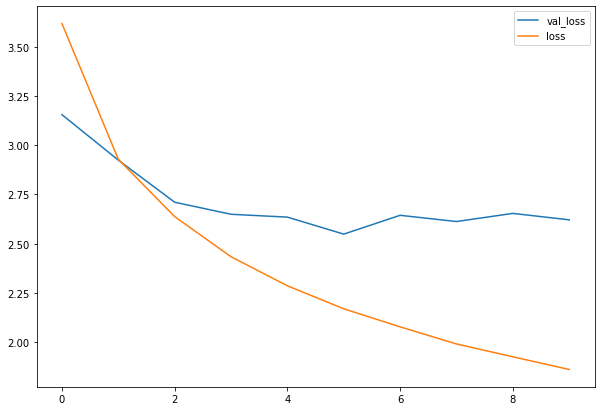

In [15]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

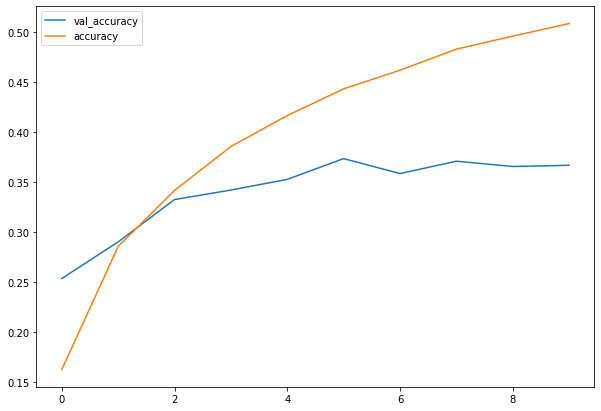

In [16]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

## 5. Train an other CNN
 - as we can see the previous archutecture is not the best...
 - come up with an architecture that can achieve more than 40% accuracy on the test set.
 - print out the summary for this model!
 - plot the loss and accuracy curves for this model too!

### Make it deeper and have more conv kernels!

In [17]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='valid'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='valid'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='valid'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='valid'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train_oh, epochs=10, batch_size=256, validation_data=(x_test, y_test_oh))

Epoch 1/10
196/196 [==============================] - 3s 18ms/step - loss: 3.6542 - accuracy: 0.1551 - val_loss: 3.1960 - val_accuracy: 0.2425
Epoch 2/10
196/196 [==============================] - 3s 16ms/step - loss: 2.8314 - accuracy: 0.3076 - val_loss: 2.7432 - val_accuracy: 0.3233
Epoch 3/10
196/196 [==============================] - 3s 16ms/step - loss: 2.4158 - accuracy: 0.3902 - val_loss: 2.5466 - val_accuracy: 0.3726
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 2.0944 - accuracy: 0.4602 - val_loss: 2.4484 - val_accuracy: 0.3990
Epoch 5/10
196/196 [==============================] - 3s 16ms/step - loss: 1.8111 - accuracy: 0.5247 - val_loss: 2.3695 - val_accuracy: 0.4142
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 1.5779 - accuracy: 0.5746 - val_loss: 2.3270 - val_accuracy: 0.4330
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 1.3605 - accuracy: 0.6286 - val_loss: 2.4757 - val_accuracy: 0.4299